In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import plot_oc_singlenode
import scipy

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

# We define colors for later convenience
color_x = 'red'
color_y = 'blue'
fs_=16
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
matplotlib.rc('xtick', labelsize=fs_) 
matplotlib.rc('ytick', labelsize=fs_) 
plt.rc('legend',fontsize=fs_)

In [68]:
savepath = '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'exploration' + os.sep + 'images_ops' + os.sep

wc = WCModel()
wc.params.sigma_ou = 0.

dt = 0.1
wc.params.dt = dt

duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration
x_init = 0.045135938287846025
y_init = 0.08586538415443892
wc.params["exc_init"] = np.array([[x_init]])
wc.params["inh_init"] = np.array([[y_init]])

wc.params["exc_ext"] = zero_input + 1.
wc.params["inh_ext"] = zero_input

wc.run()
peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
p_list = []
for i in range(3,len(peaks)):
    p_list.append(peaks[i]- peaks[i-1])
period = np.mean(p_list)*dt

def plot_all(c_array, filename, ymax):

    fig, ax = plt.subplots(len(c_array),1, figsize=(10,2.*len(c_array)))

    time = np.arange(0, duration+dt, dt)

    for i in range(len(c_array)):
        ax[i].plot(time, c_array[i][0,:], color="red")
        ax[i].plot(time, c_array[i][0,1,:], color="blue")
        ax[i].set_ylim([-ymax,ymax])
        ax[i].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        ax[i].set_xlim(0, duration)
        ax[i].vlines(200, -ymax, ymax, color="grey")
        if i != len(c_array)-1:
            ax[i].set_xticklabels([])

    plt.savefig(os.path.join(savepath, filename))
    plt.show()


savepath_subset = '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep + 'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep

def plot_subset(s_array, c_array, filename, symax, cymax):

    fig, ax = plt.subplots(14,1, figsize=(10,30))

    time = np.arange(0, duration+dt, dt)

    i_range = [5, 10, 15, 20, 25, 30, 35]

    for j in range(len(i_range)):
        i = i_range[j]

        ax[2*j].plot(time, s_array[i][0,0,:], color="red")
        ax[2*j].plot(time, s_array[i][0,1,:], color="blue")
        ax[2*j].set_ylim([0,symax])
        ax[2*j].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        ax[2*j].set_xlim(0, duration)
        ax[2*j].vlines(200, 0, symax, color="grey")
        ax[2*j].set_xticklabels([])

        ax[2*j+1].plot(time, c_array[i][0,0,:], color="red")
        ax[2*j+1].plot(time, c_array[i][0,1,:], color="blue")
        ax[2*j+1].set_ylim([-cymax,cymax])
        #ax[2*j+1].set_title(str(np.round(i*2./(len(c_array)-1), 2))+ " * pi")
        ax[2*j+1].set_xlim(0, duration)
        ax[2*j+1].vlines(200, -cymax, cymax, color="grey")

        if j != 6:
            ax[2*j+1].set_xticklabels([])

    plt.savefig(os.path.join(savepath_subset, filename))
    plt.show()

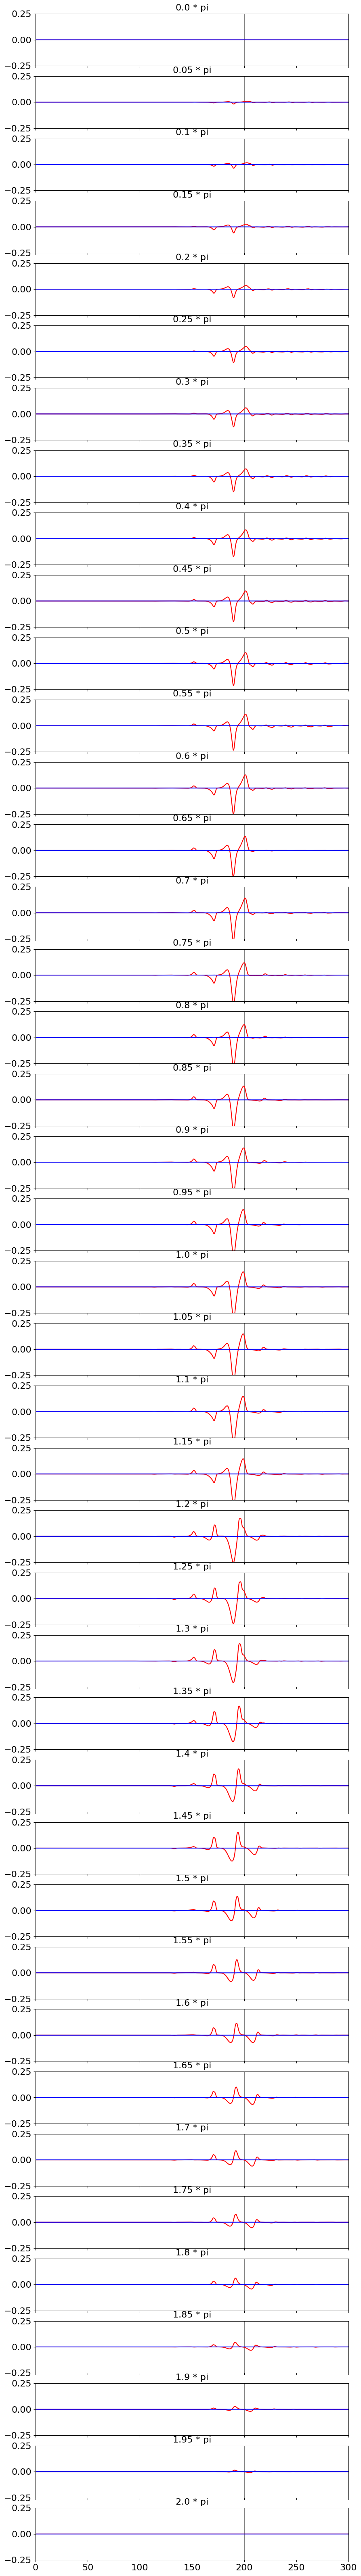

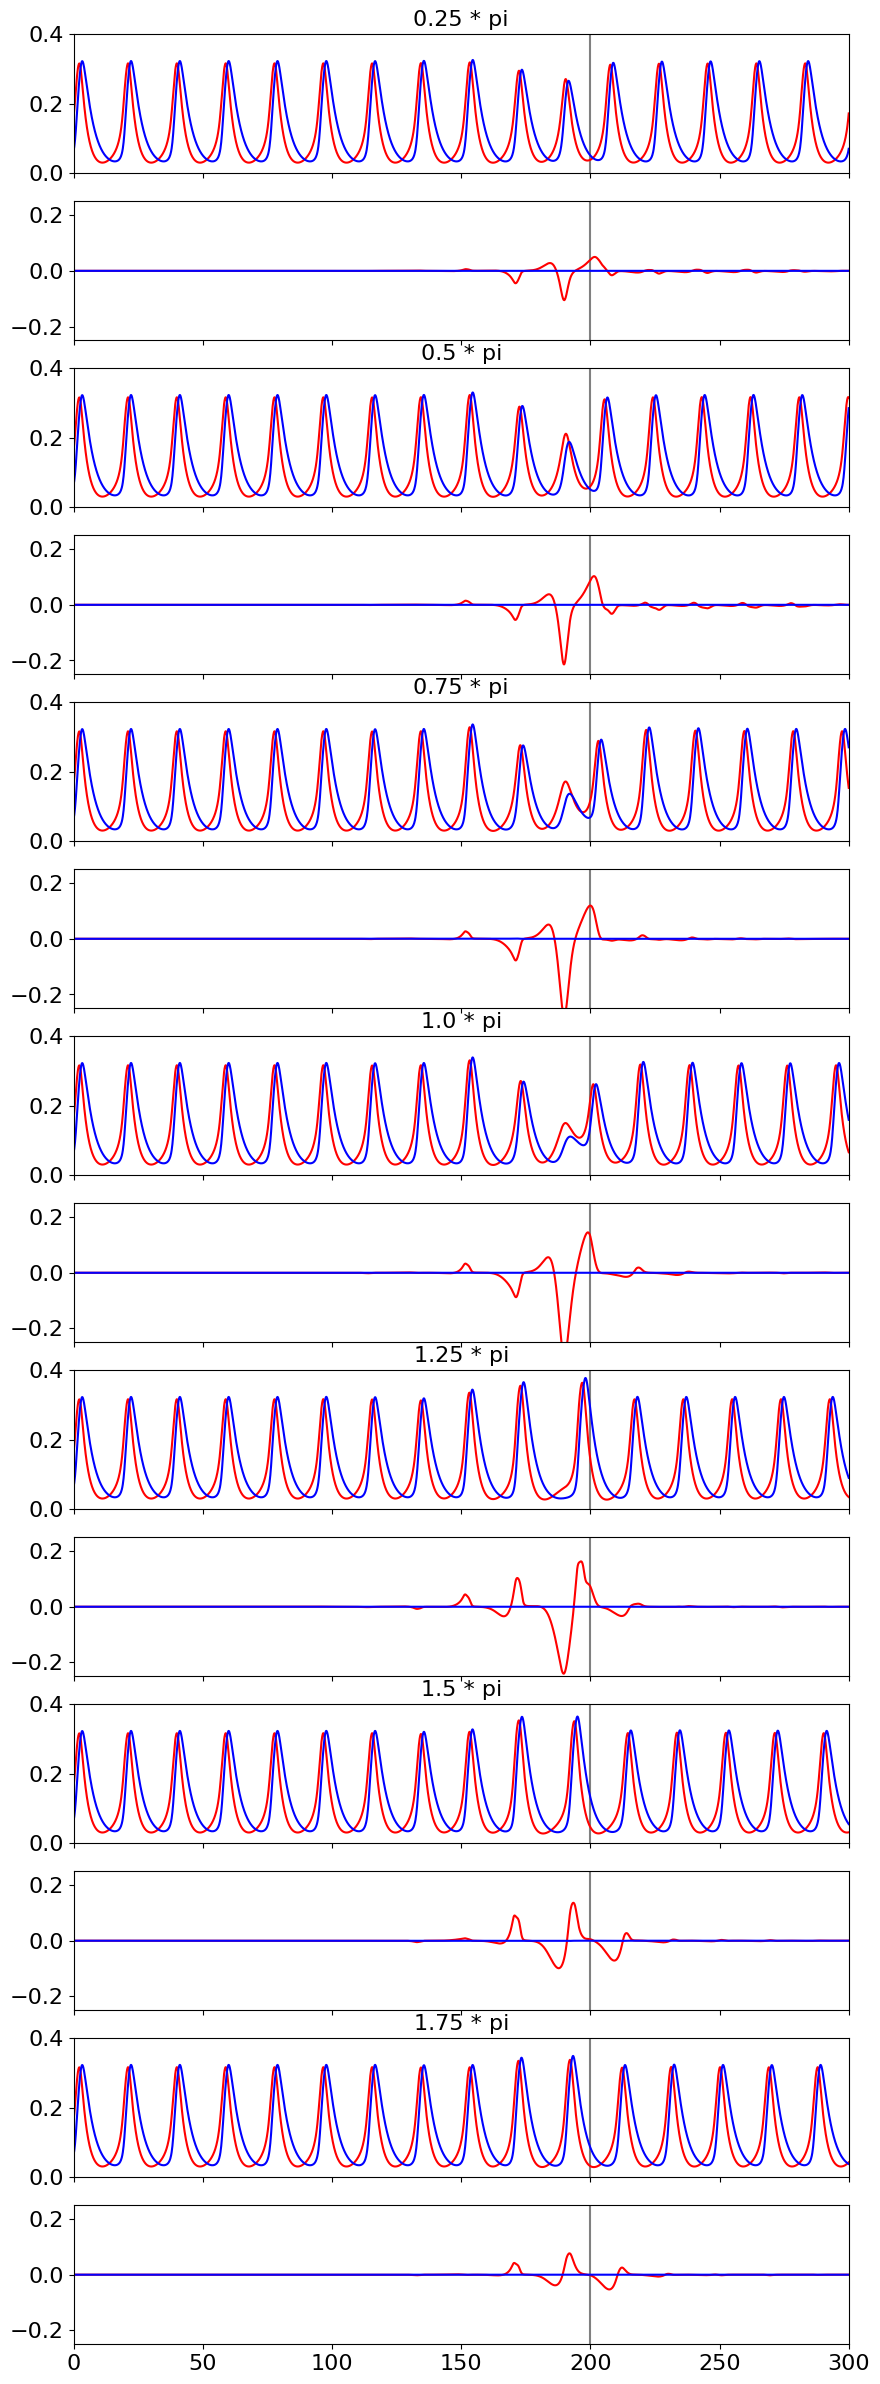

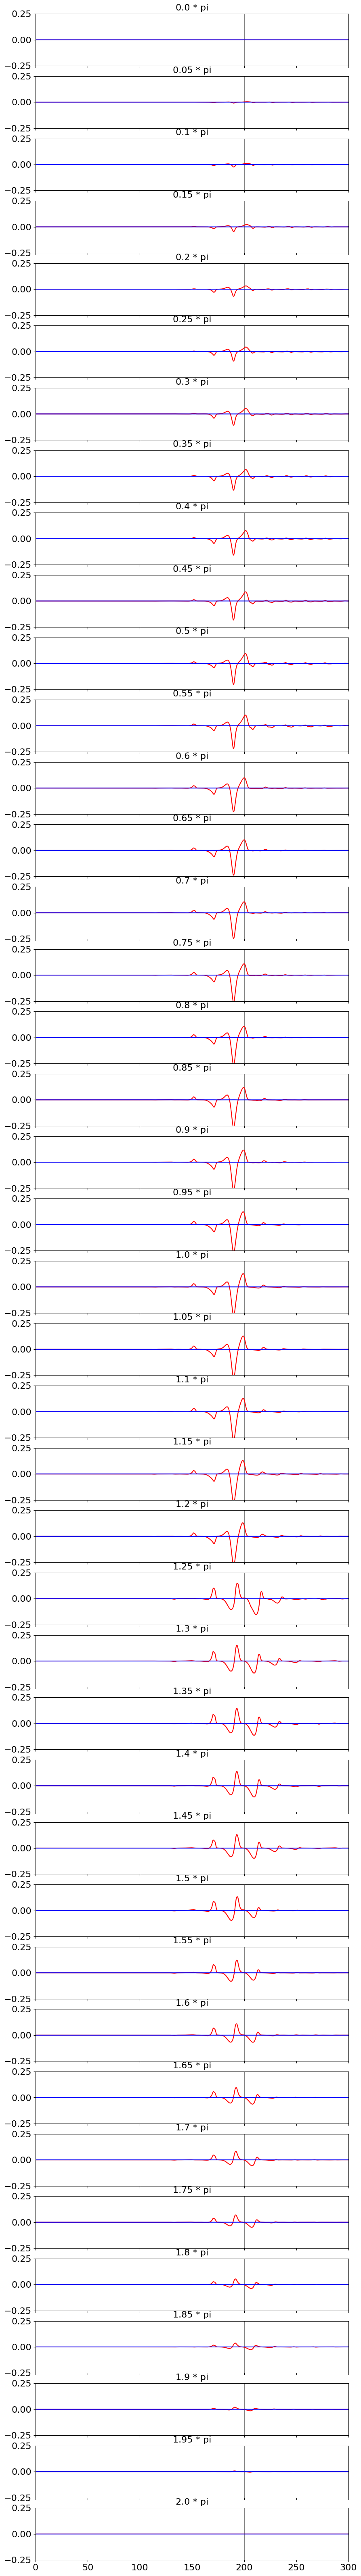

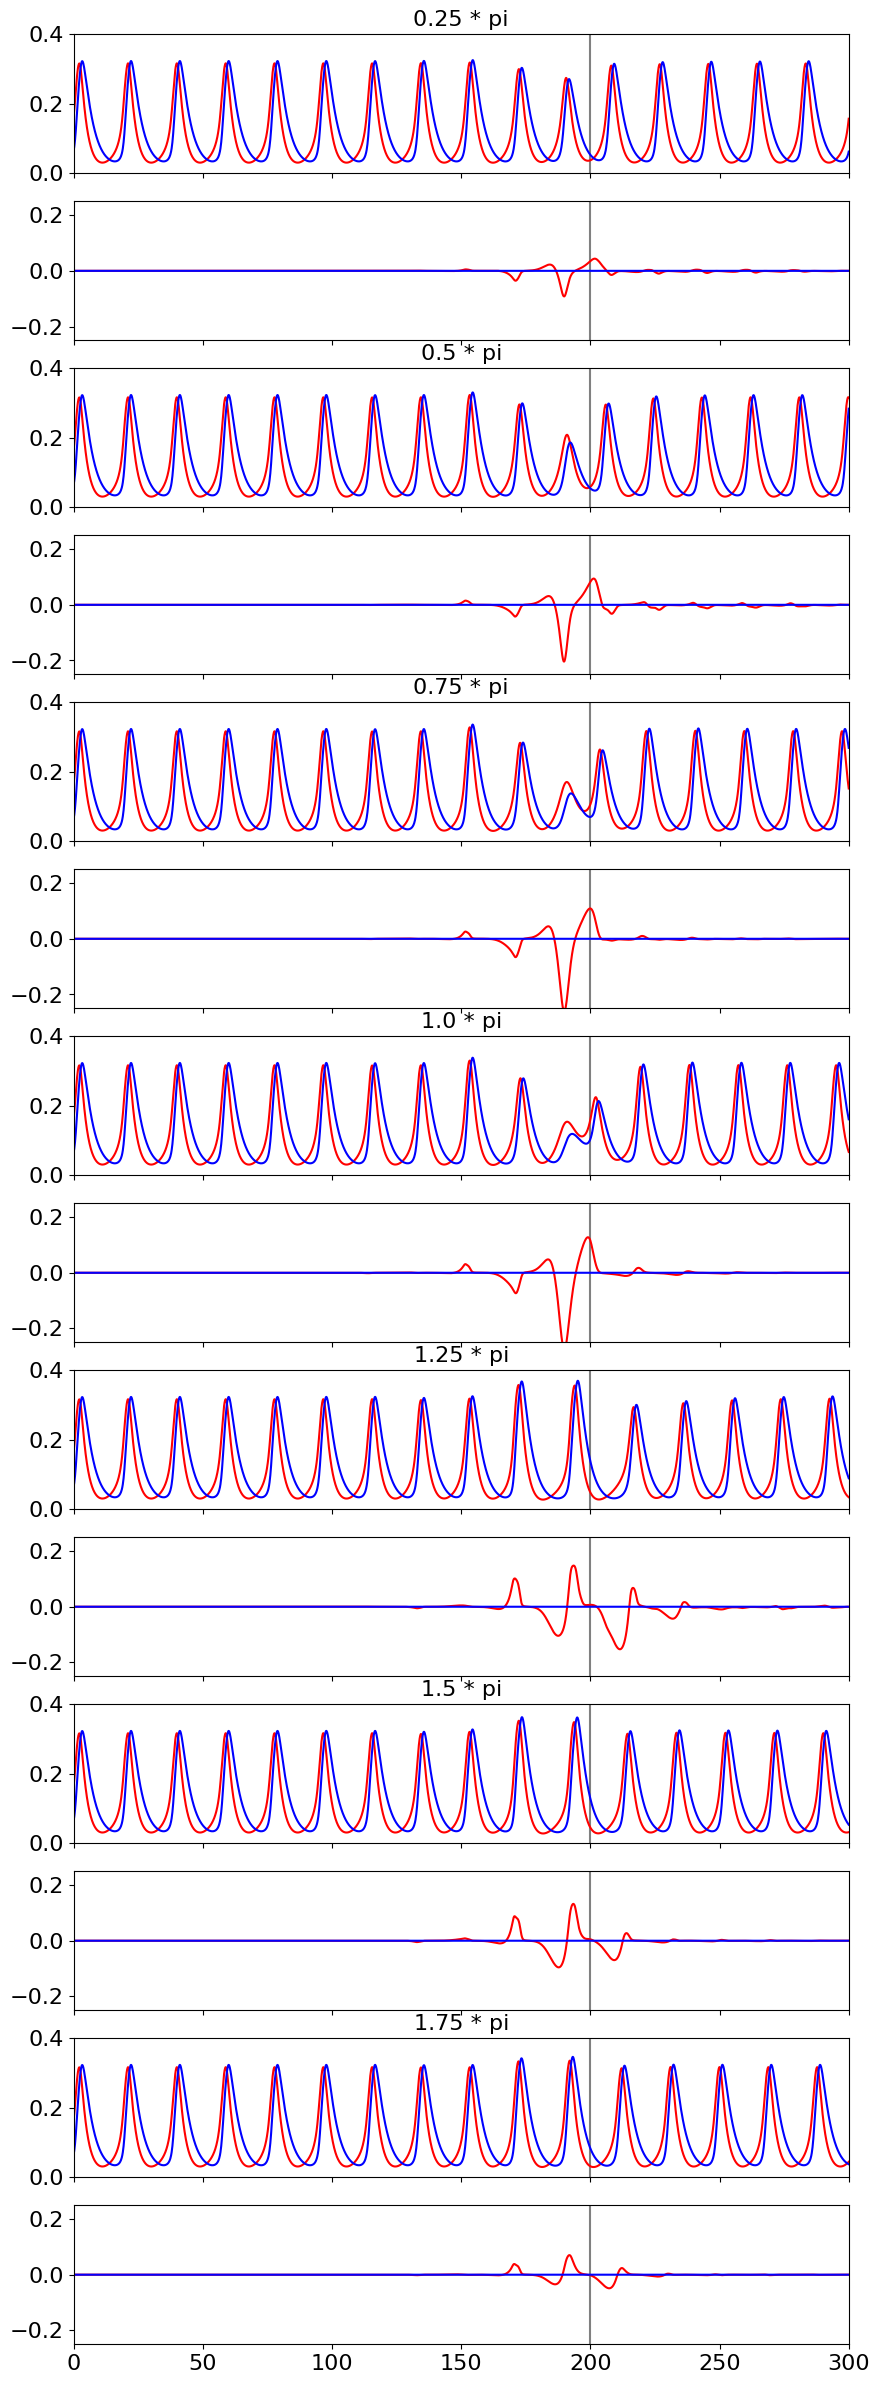

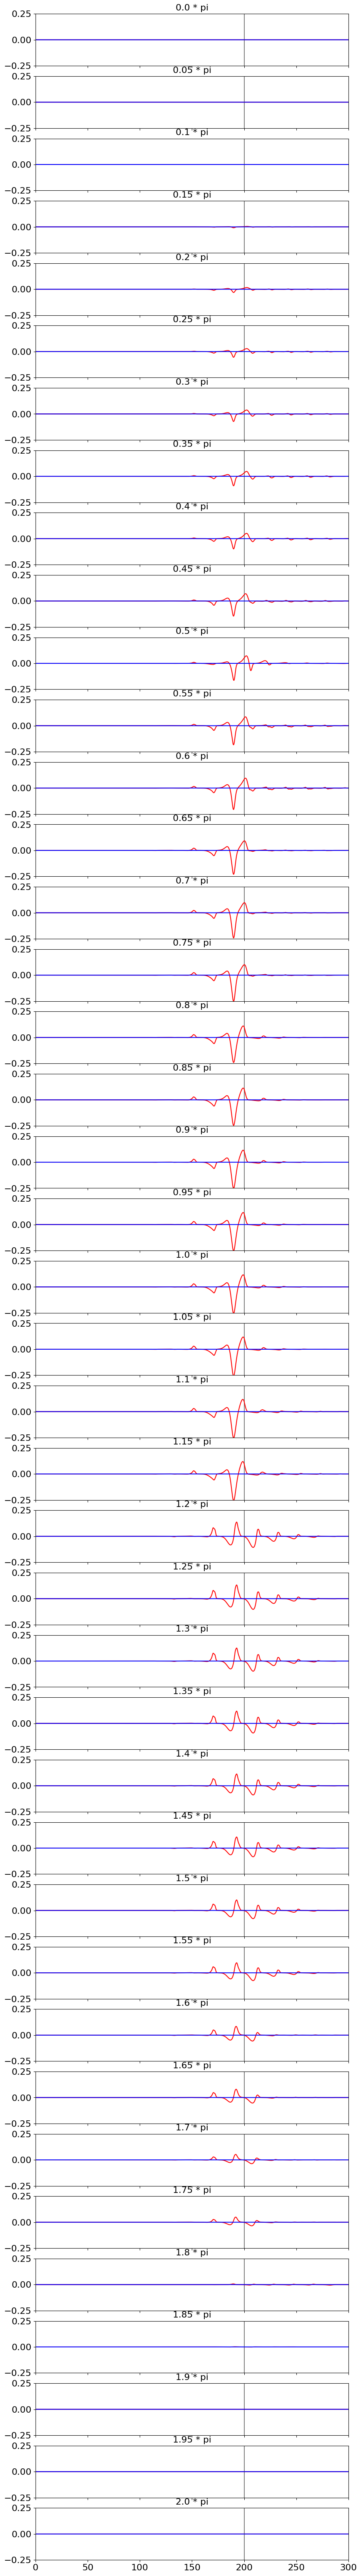

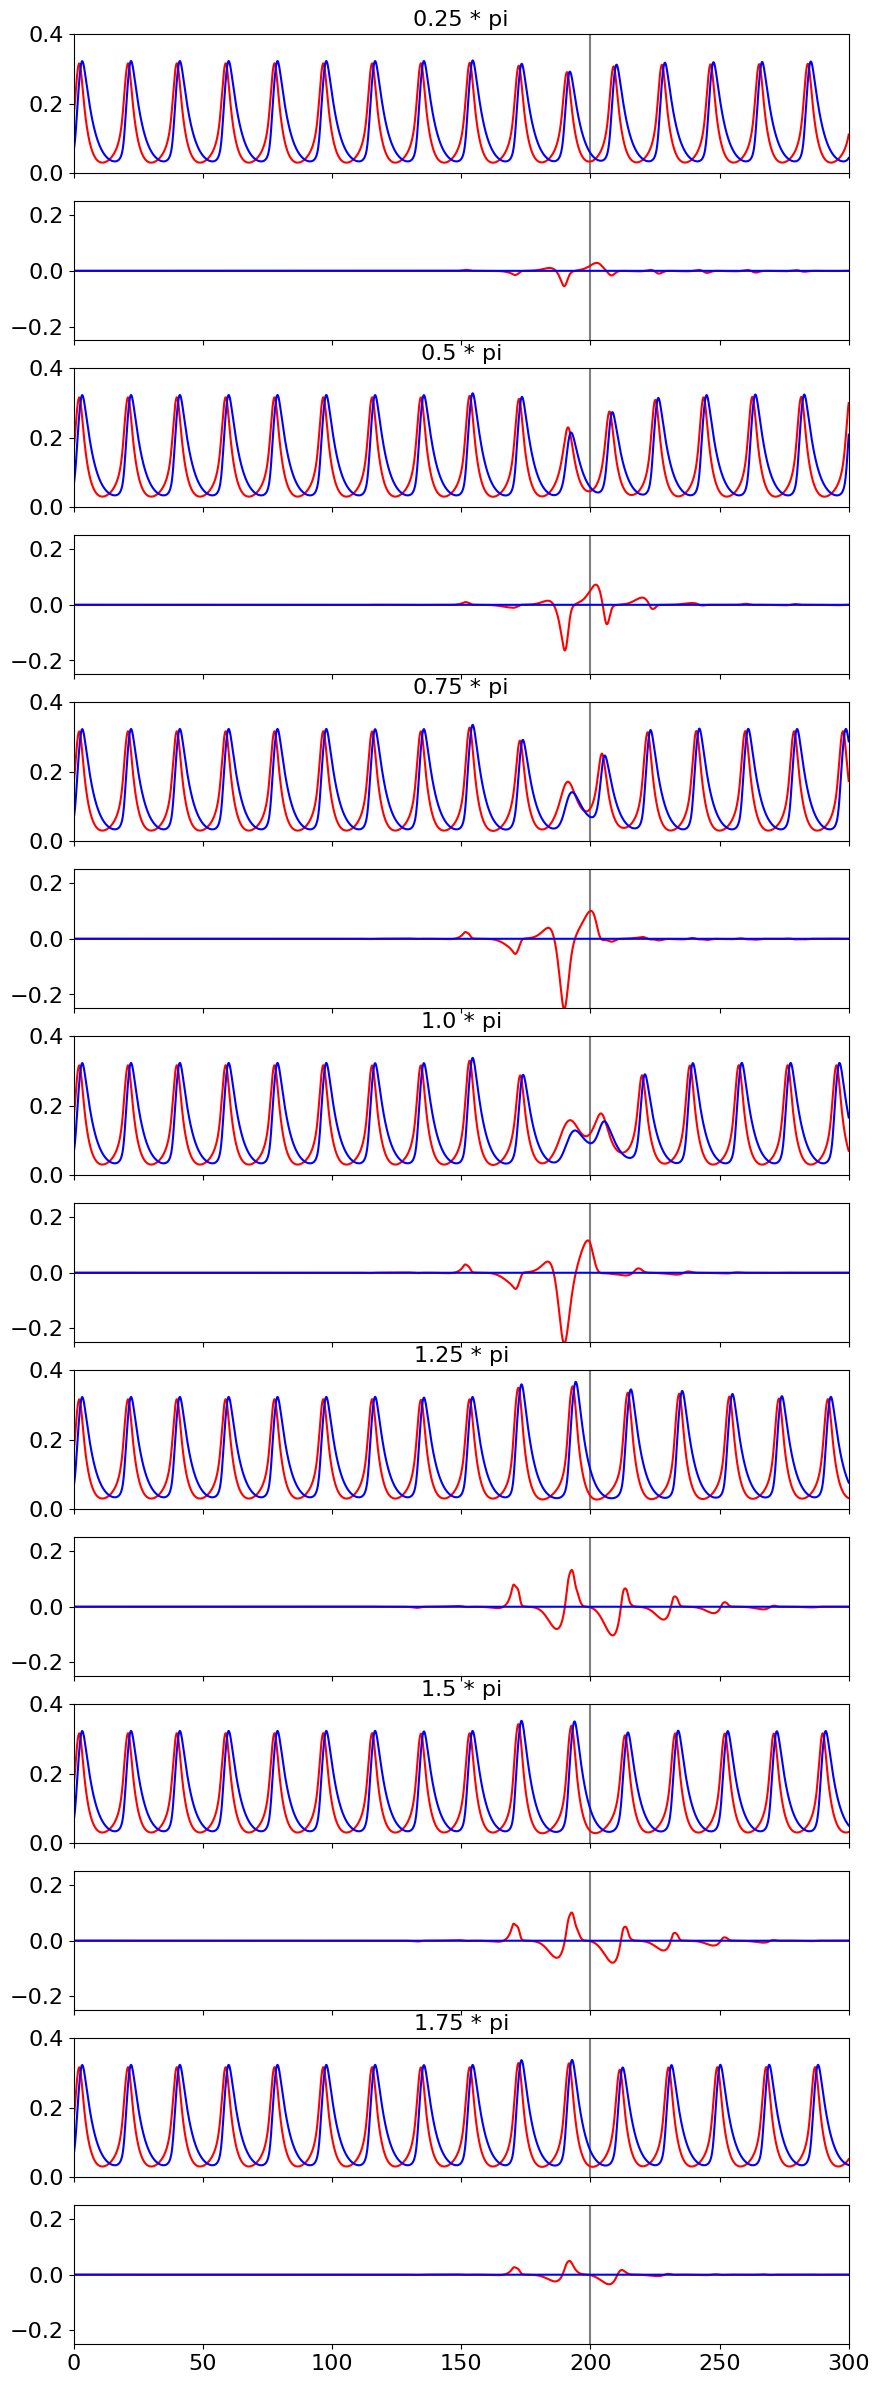

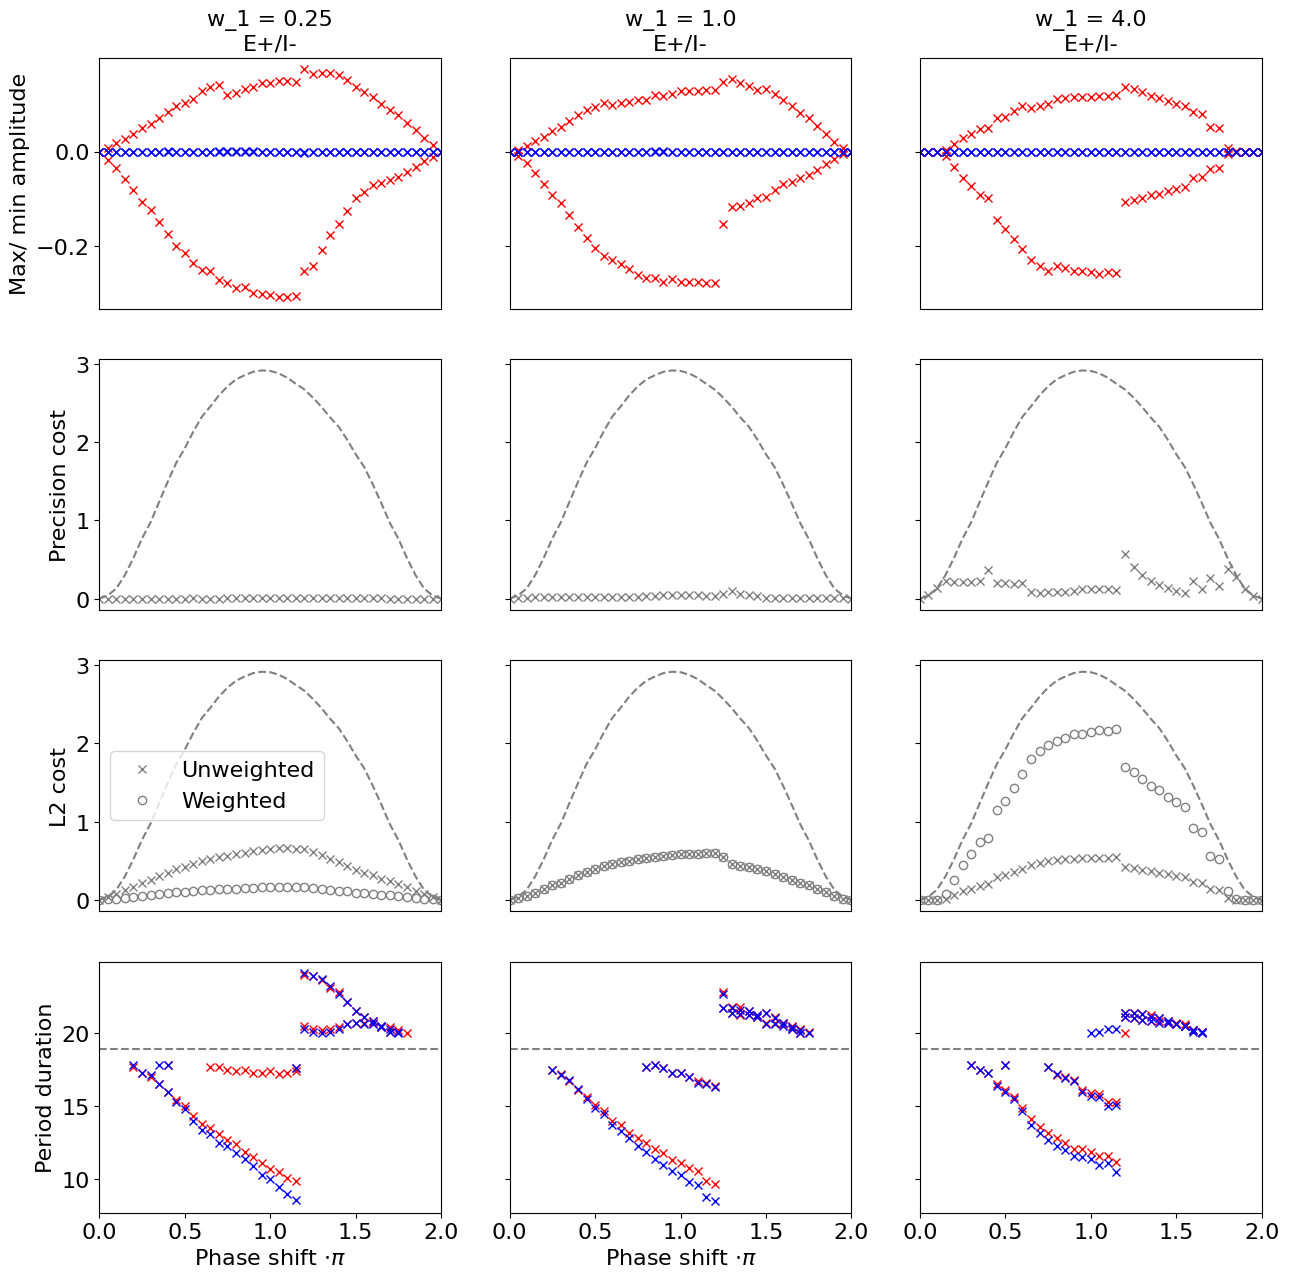

0.0011627821727378355
0.0015099793817475802
0.0012346983644256706
0.0020562905252345938


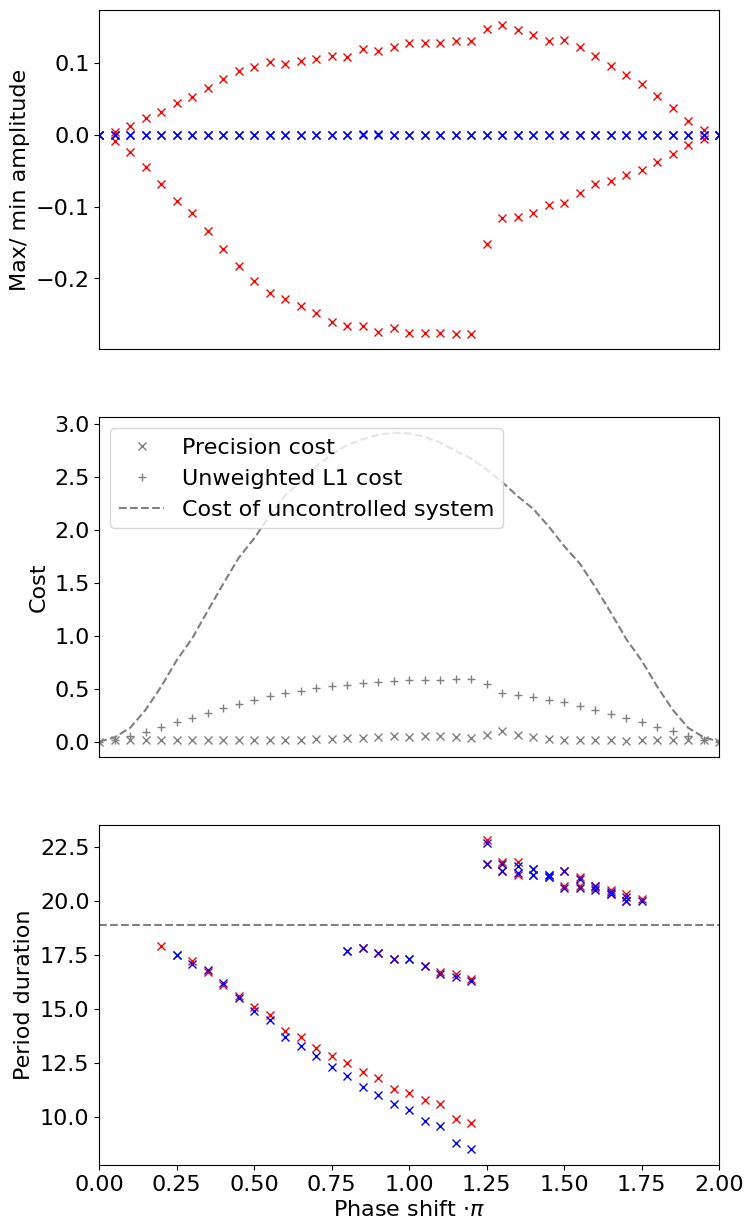

In [130]:
filehandler = open("results_min_w1.pickle","rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

for i_w in range(len(results_min_w1["w1"])):
    plot_all(results_min_w1["control"][i_w], results_min_w1["filename"][i_w], 0.25)
    plot_subset(results_min_w1["state"][i_w], results_min_w1["control"][i_w], results_min_w1["filename"][i_w], 0.4, 0.25)

plot1(results_min_w1, "min_w1_plot1.png")
plot2(results_min_w1, "min_w1_plot2.png")

plot1_subset(results_min_w1, "min_w1_1_plot1.png")
plot2_subset(results_min_w1, "min_w1_1_plot2.png")

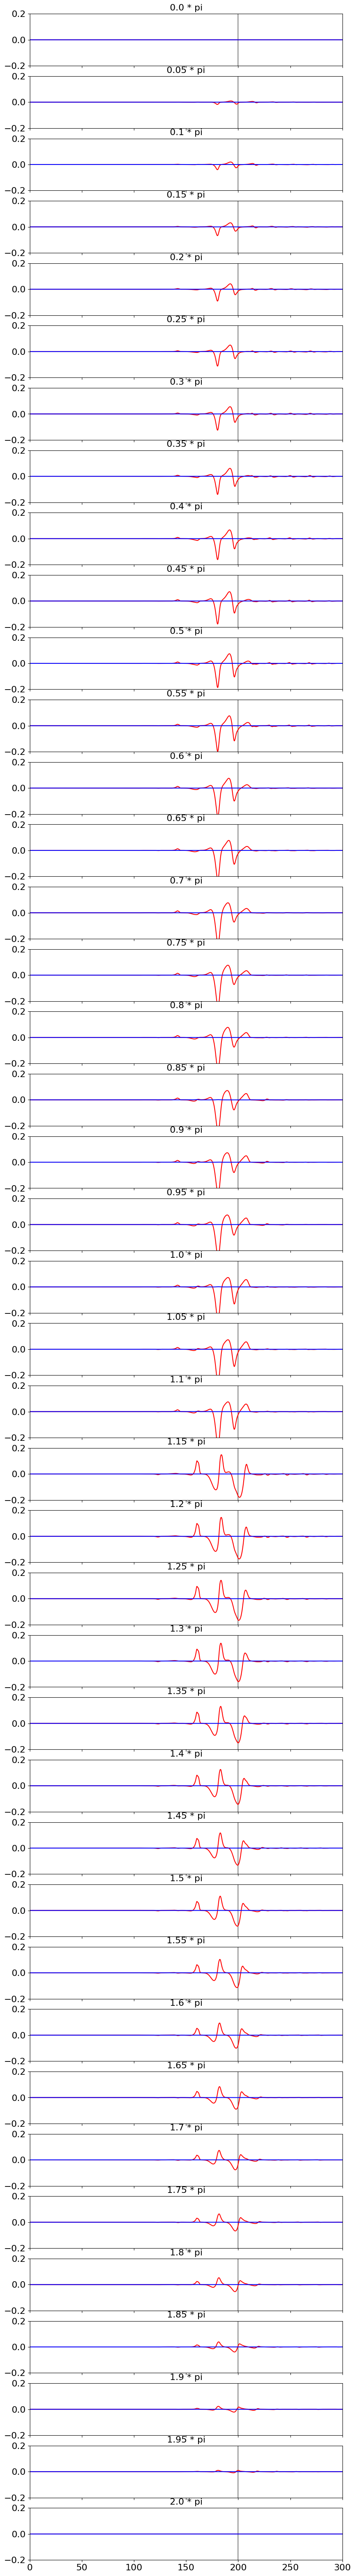

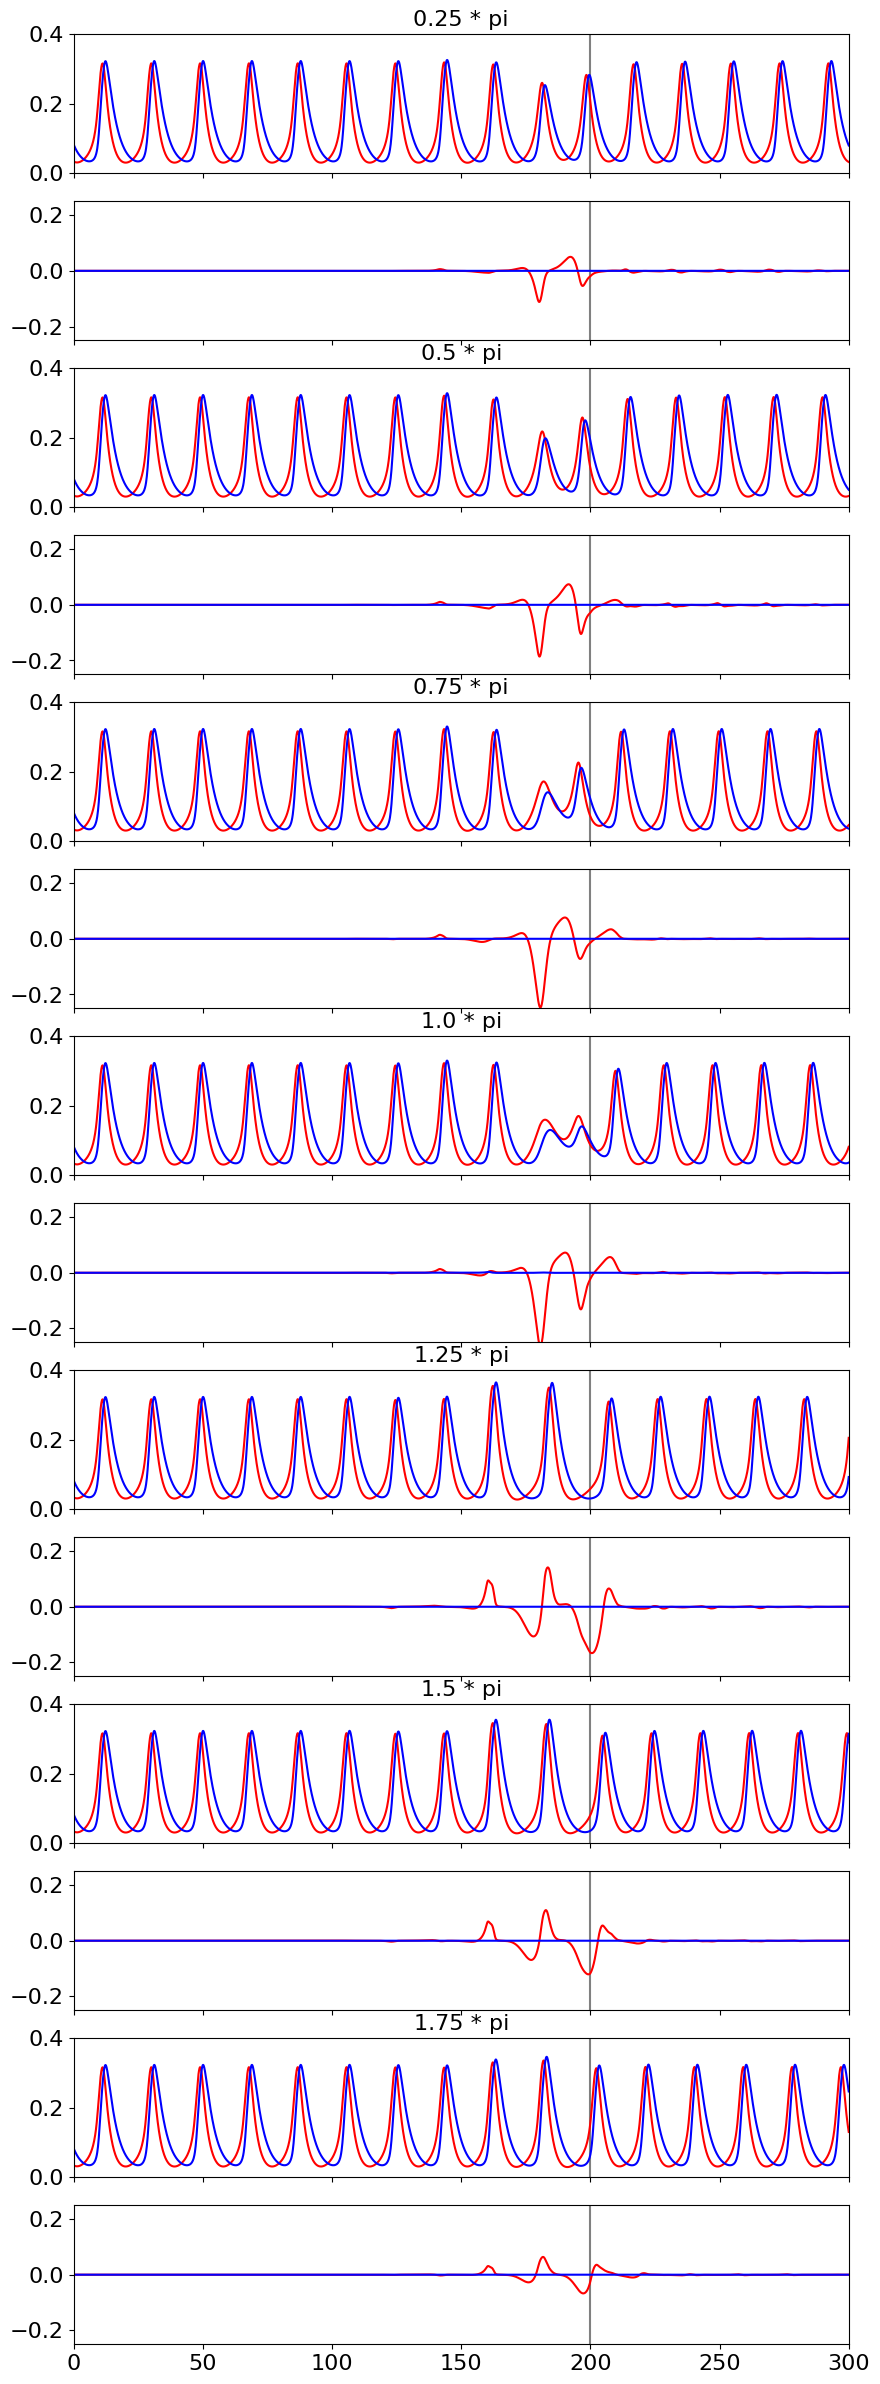

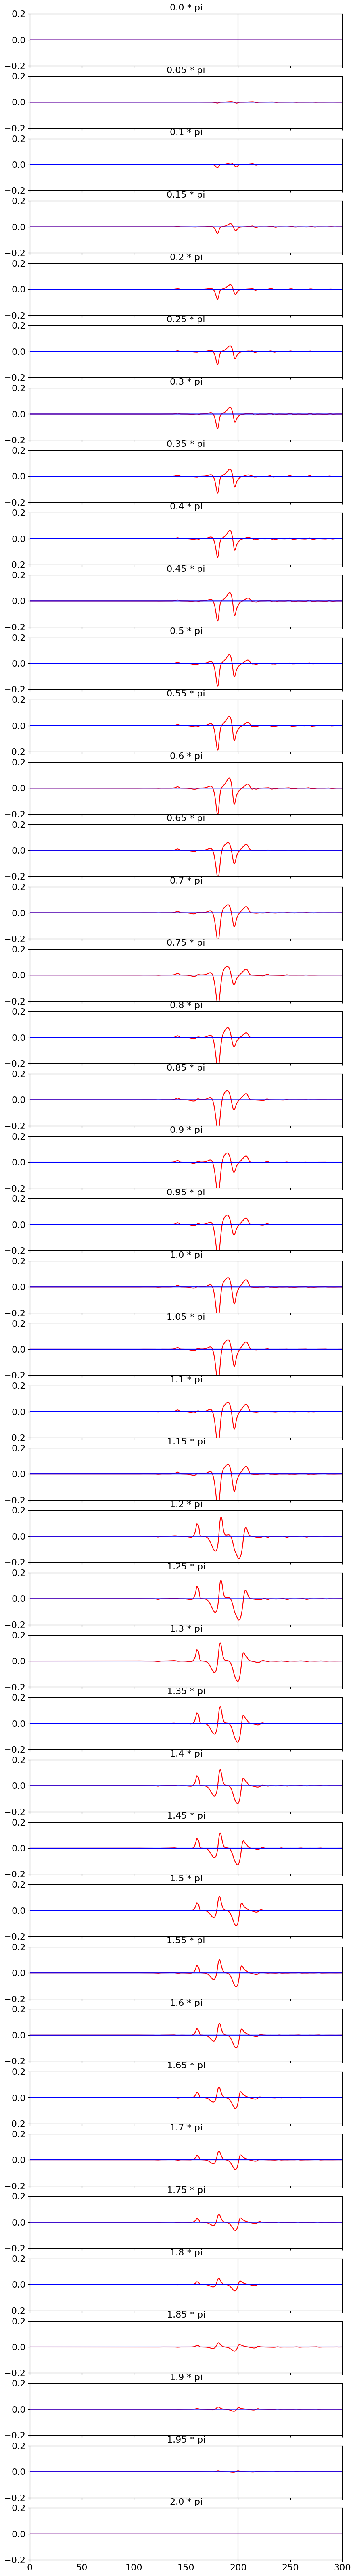

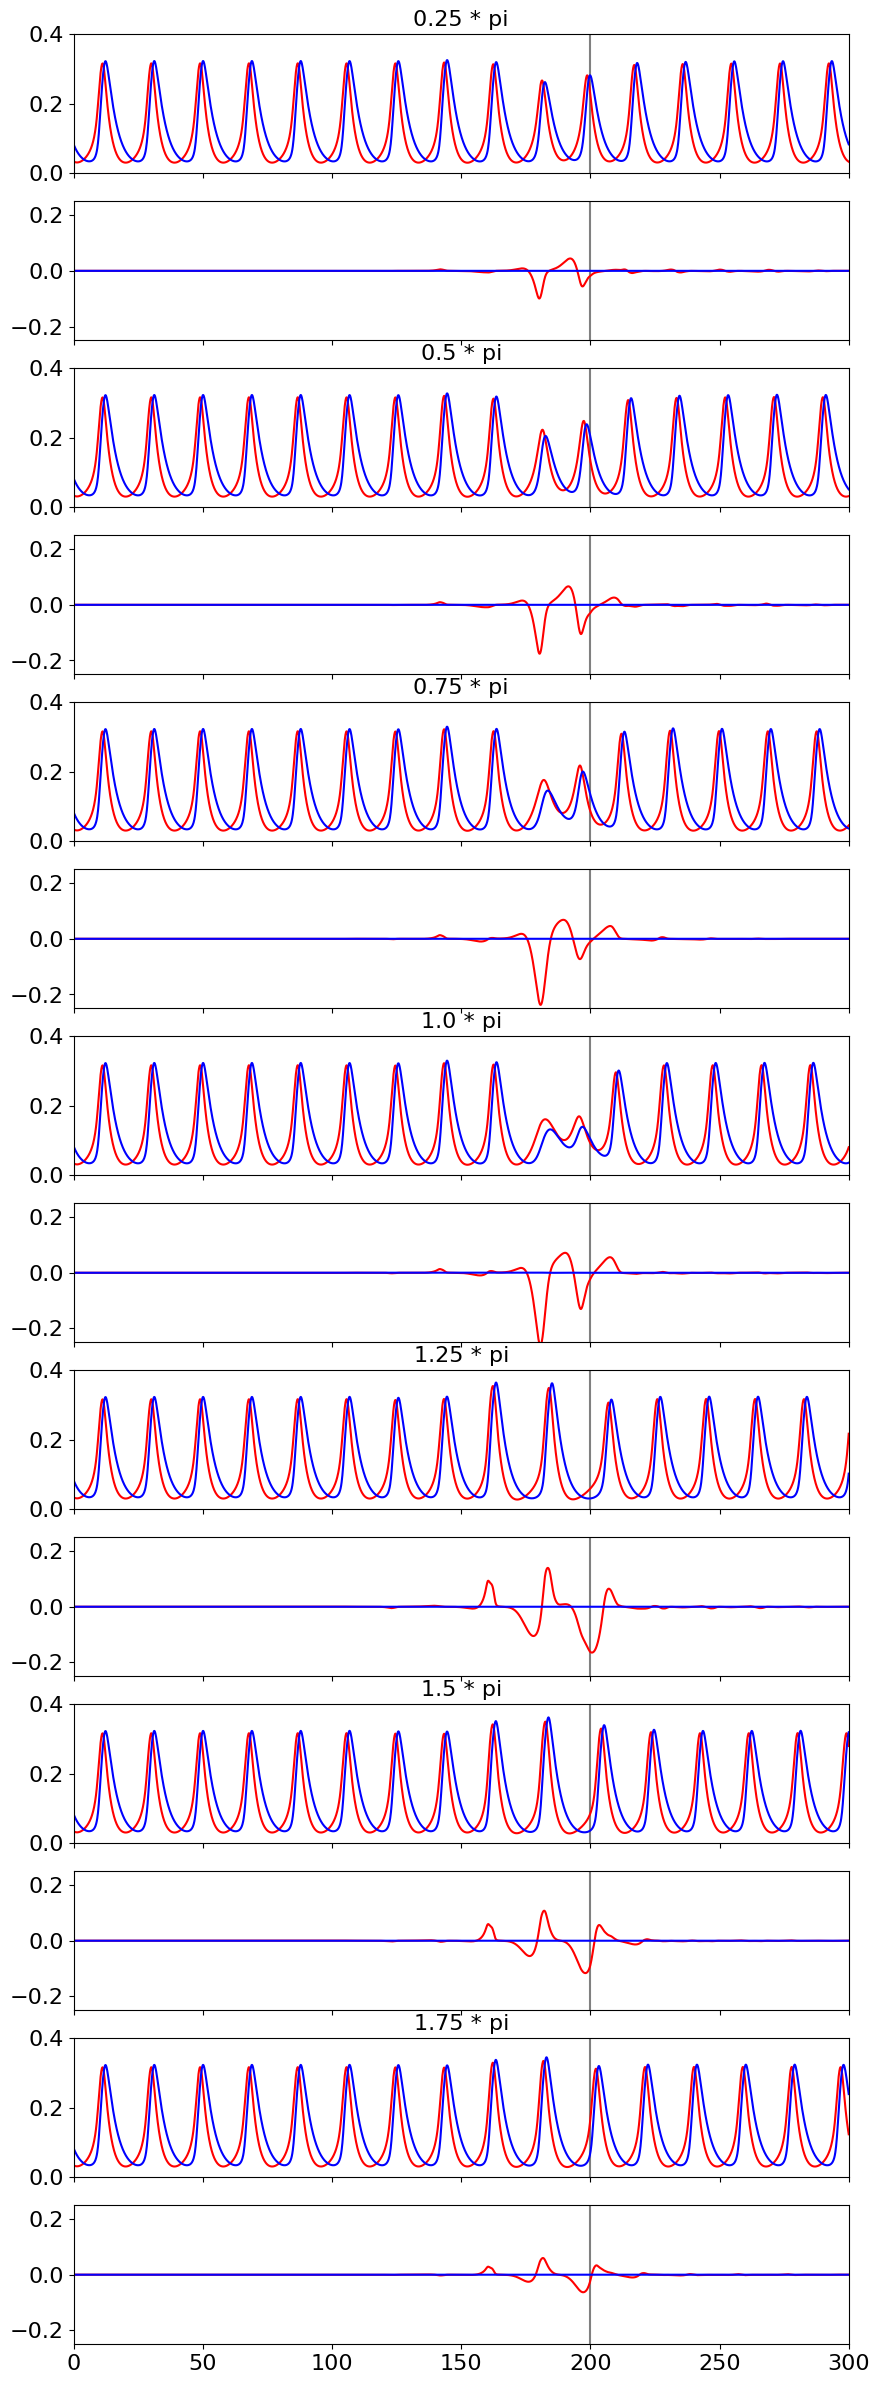

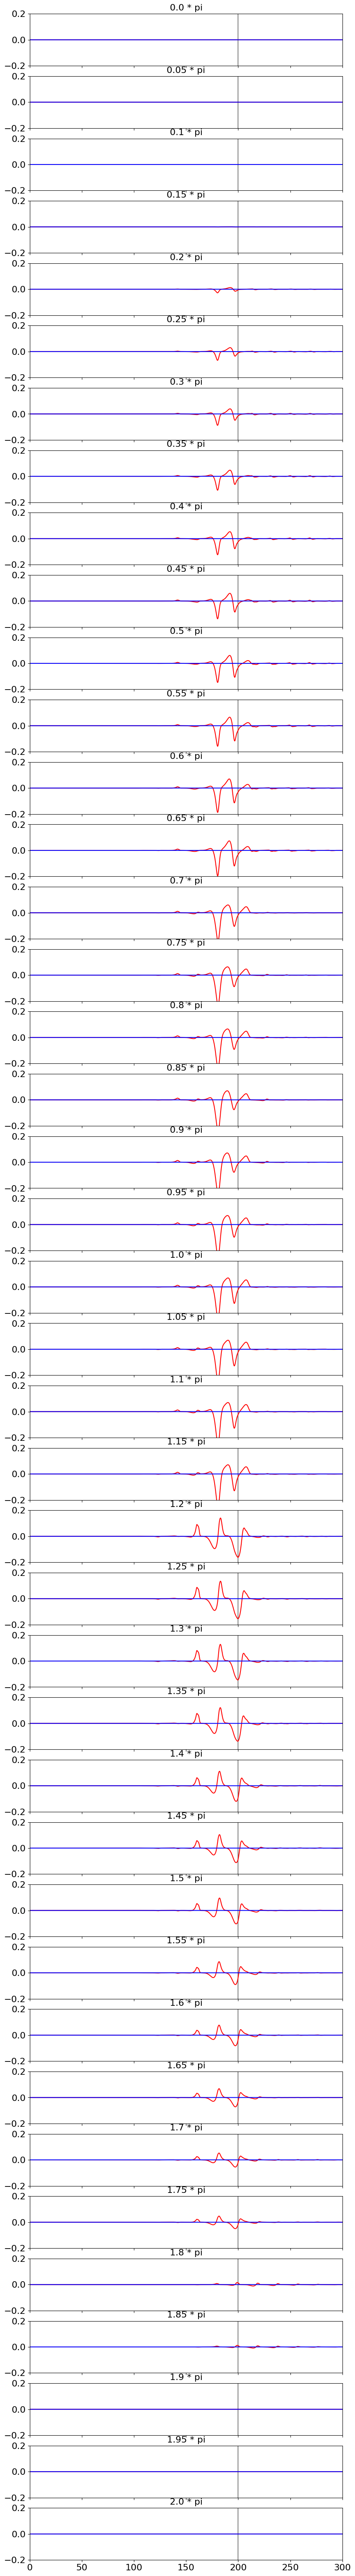

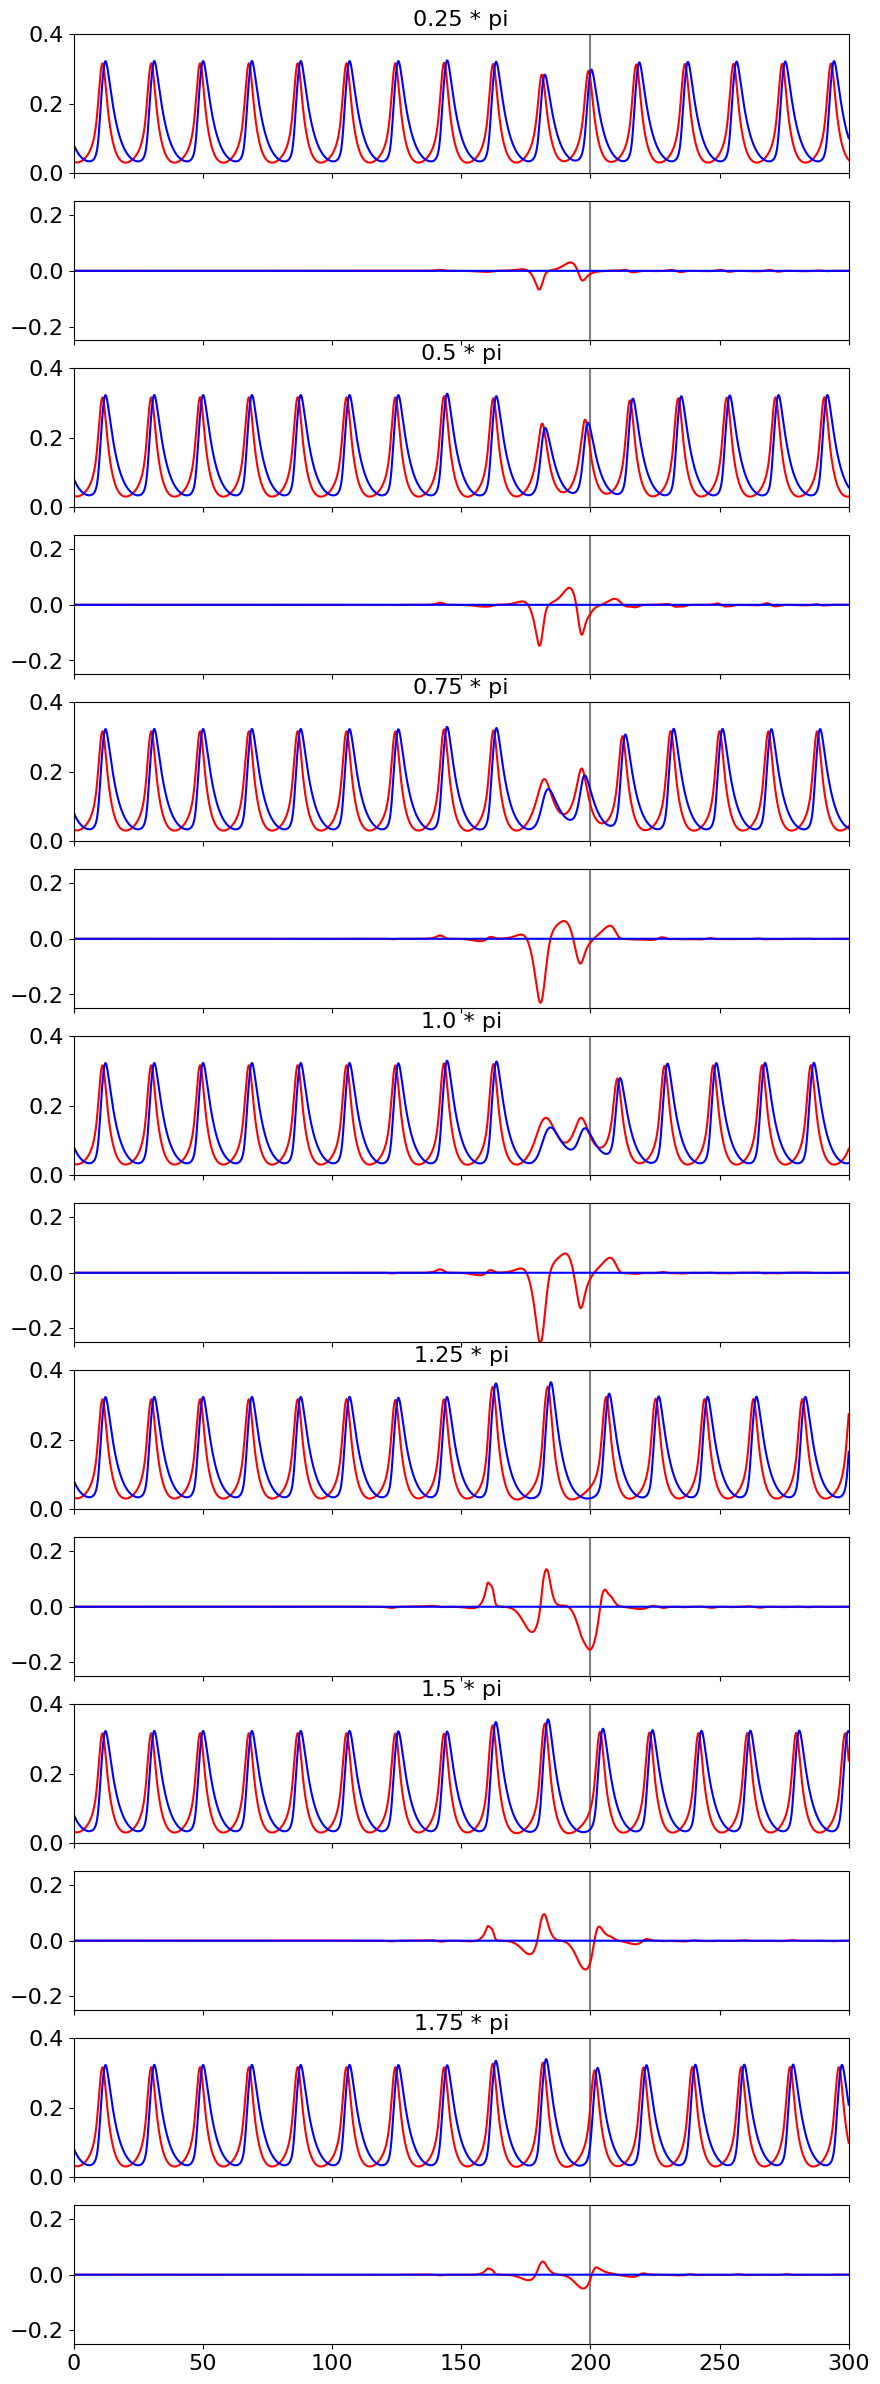

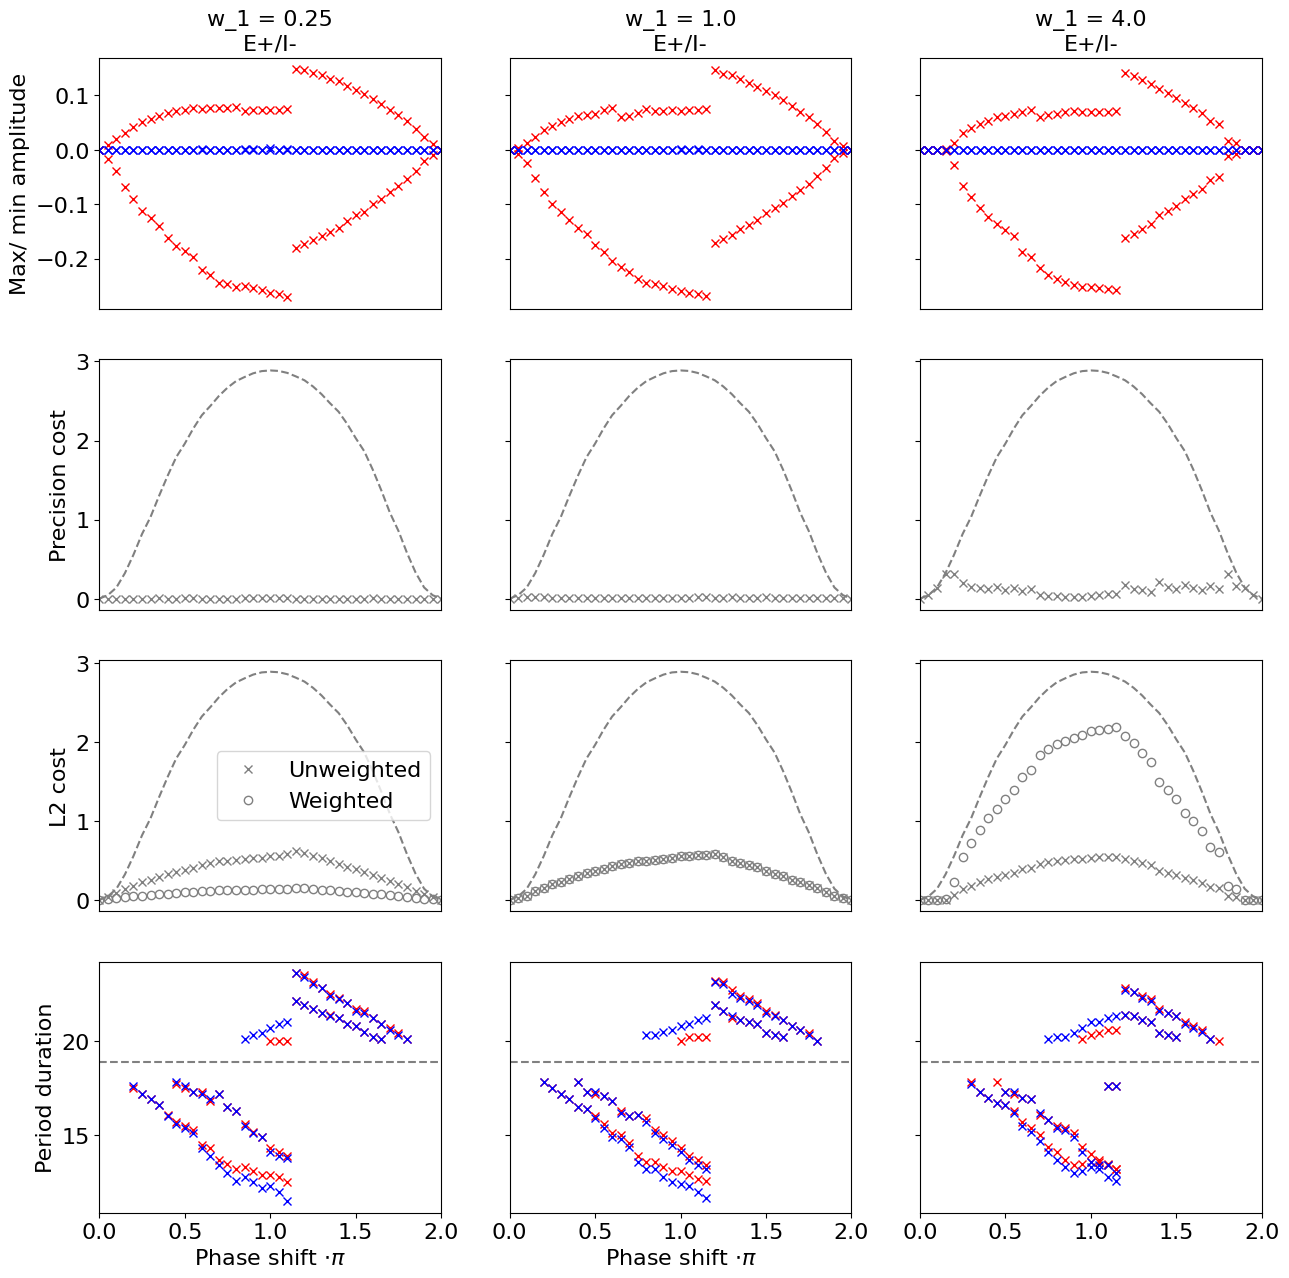

0.0022361934543713
0.0016704266484588257
0.003107075466326931
0.0013972069573583497
0.0010572131875819075


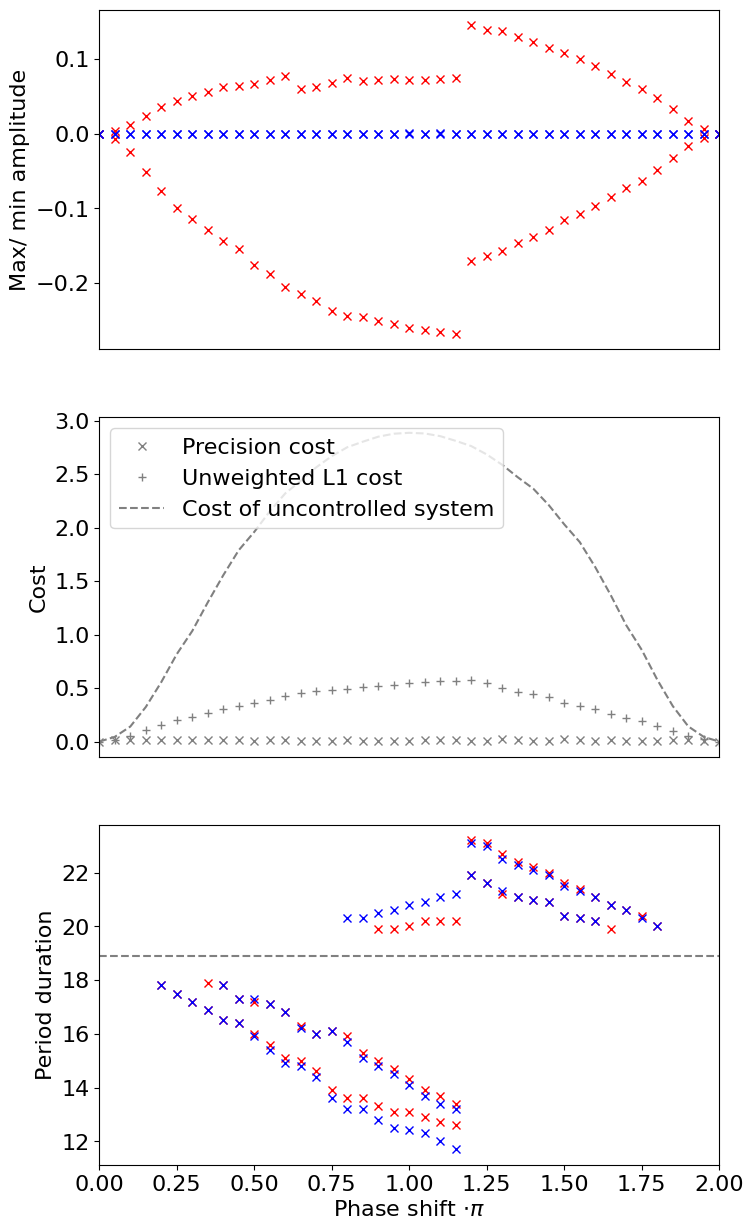

0.0010572131875819075


In [131]:
filehandler = open("results_peak_w1.pickle","rb")
results_peak_w1 = pickle.load(filehandler)
filehandler.close()

for i_w in range(len(results_peak_w1["w1"])):
    plot_all(results_peak_w1["control"][i_w], results_peak_w1["filename"][i_w], 0.2)
    plot_subset(results_peak_w1["state"][i_w], results_peak_w1["control"][i_w], results_peak_w1["filename"][i_w], 0.4, 0.25)

plot1(results_peak_w1, "peak_w1_plot1.png")
plot2(results_peak_w1, "peak_w1_plot2.png")

plot1_subset(results_peak_w1, "peak_w1_1_plot1.png")
plot2_subset(results_peak_w1, "peak_w1_1_plot2.png")

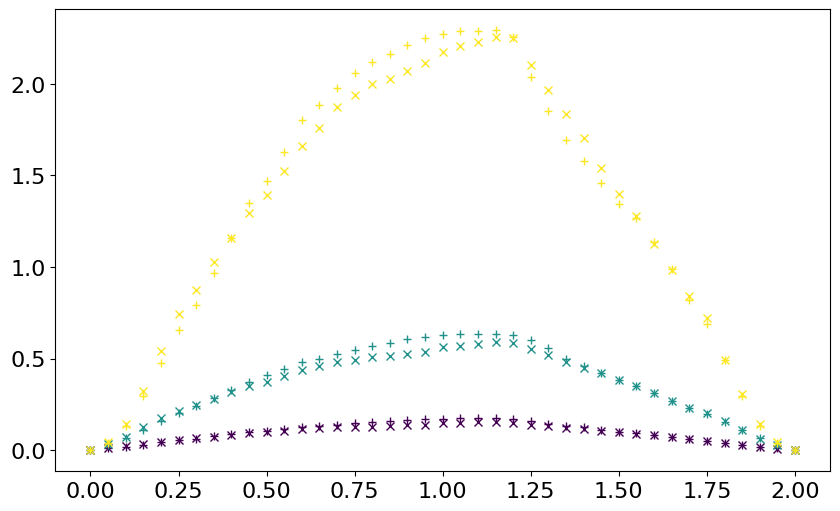

In [132]:
iw = 0
cmap_vi = matplotlib.cm.get_cmap('viridis')

for iw in range(3):
    for i_shift in range(41):
        plt.plot(i_shift*2./(40), results_peak_w1["total_cost"][iw][i_shift][-1], marker="x", color=cmap_vi(iw/2.))
        plt.plot(i_shift*2./(40), results_min_w1["total_cost"][iw][i_shift][-1], marker="+", color=cmap_vi(iw/2.))

plt.show()


In [106]:
def addtrace_subset(fig, radii, theta, cstr, height,i):
    fig.add_trace(go.Scatterpolar(
                r = radii,
                theta = theta,
                thetaunit = "radians",
                mode = 'lines+markers',
                name = 'Figure 8',
                line_color = cstr,
                line_width = 1,
                marker_size=2.+height*100.,
            ), i, 1)

def plot2_subset(results_dict, filename):
    n_points = len(results_dict["total_cost"][0])
    r = 2

    t_str = []
    t_str.append("E+/I-")
    t_str.append("E-/I+")

    fig = make_subplots(rows=r, cols=1, specs=[[{'type': 'polar'}]*1]*r,
            subplot_titles=t_str,
            )

    for i_w in [1]:

        for i_shift in range(n_points):

            peaks = scipy.signal.find_peaks(np.abs(results_dict["state"][i_w][i_shift][0,0,:]))[0]
            periods = np.zeros(( len(peaks) -1 ))
            for i in range(len(peaks)-1):
                periods[i] = (peaks[i+1] - peaks[i])*dt

            for e_i in [0,1]:

                if np.amax(np.abs(results_dict["control"][i_w][i_shift][0,e_i,:])) < 1e-3:
                    continue

                if e_i == 1:
                    print(np.amax(np.abs(results_dict["control"][i_w][i_shift][0,e_i,:])))
                    continue

                cplus = np.zeros((results_dict["control"][i_w][i_shift][0,e_i,:].shape))
                for t in range(len(cplus)):
                    cplus[t] = max(0., results_dict["control"][i_w][i_shift][0,e_i,t])
                max_p = np.amax(cplus)
                peaks_control_p = scipy.signal.find_peaks( cplus, height=0.5*max_p)[0]

                height_plus = np.zeros((len(peaks_control_p)))
                for i in range(len(height_plus)):
                    height_plus[i] = np.abs(results_dict["control"][i_w][i_shift][0,e_i,peaks_control_p[i]])

                cminus = np.zeros((results_dict["control"][i_w][i_shift][0,e_i,:].shape))
                for t in range(len(cminus)):
                    cminus[t] = max(0., -results_dict["control"][i_w][i_shift][0,e_i,t])
                max_m = np.amax(cminus)
                peaks_control_m = scipy.signal.find_peaks( cminus, height=0.5*max_m)[0]
                    
                height_minus = np.zeros((len(peaks_control_m)))
                for i in range(len(height_minus)):
                    height_minus[i] = np.abs(results_dict["control"][i_w][i_shift][0,e_i,peaks_control_m[i]])
                
                timing, radii = [], []
                for i in range(len(peaks)-1):
                    for pce in peaks_control_p:
                        if pce < peaks[i+1] and pce >= peaks[i]:
                            timing.append(2. * np.pi * (pce - peaks[i])*dt / periods[i])
                            radii.append(pce*dt)

                if e_i == 0:
                    col = cmap_red(0.2 + i_shift*0.8/(n_points-1))
                elif e_i == 1:
                    col = cmap_blue(0.2 + i_shift*0.8/(n_points-1))
                col_str = 'rgb(' + str(col[0]) + ', ' + str(col[1]) + ', ' + str(col[2]) + ')'
                
                if e_i == 0:
                    i = 1
                else:
                    i = 2
                        
                addtrace_subset(fig, radii, timing, col_str, height_plus, i)

                timing, radii = [], []
                for i in range(len(peaks)-1):
                    for pce in peaks_control_m:
                        if pce < peaks[i+1] and pce >= peaks[i]:
                            timing.append(2. * np.pi * (pce - peaks[i])*dt/ periods[i])
                            radii.append(pce*dt)

                if e_i == 1:
                    i = 1
                else:
                    i = 2
                        
                addtrace_subset(fig, radii, timing, col_str, height_minus, i)


    fig.update_layout(
        showlegend=False,
        width=500,
        height=1000,
        polar = polardict(),
        polar2 = polardict(),
    )

    fig.layout.annotations[0].update(y=1.05)
    fig.layout.annotations[1].update(y=0.45)

    fig.write_image(os.path.join(savepath, filename))
    fig.write_image(os.path.join(savepath_subset, filename))
    fig.show()

In [97]:
def plot1_subset(results_dict, filename):

    period_diff = 0.05*period

    n_points = len(results_dict["total_cost"][0])

    init_costs = np.zeros((n_points))
    for i in range(len(init_costs)):
        init_costs[i] = results_dict["total_cost"][0][i][0]

    from matplotlib.lines import Line2D

    custom_legend_cost = [
                    Line2D([0], [0], color="grey", linestyle="", marker="x"),
                    Line2D([0], [0], color="grey", linestyle="", marker='+'),
                    Line2D([0], [0], color="grey", linestyle="--"),
                    ]

    r,c = 3,1
    fig, ax = plt.subplots(r,c, sharey='row', figsize=(8,15))

    ax[0].set_ylabel("Max/ min amplitude")
    ax[1].set_ylabel("Cost")
    ax[2].set_ylabel("Period duration")

    ax[-1].set_xlabel(r"Phase shift $\cdot \pi$")


    for i in range(r-1):
        ax[i].set_xticks([])

    for i in range(r):
        ax[i].set_xlim([0,2])

    for ind_w in [1]:

        for i_shift in range(n_points):
            period_shift = i_shift* 2. / (n_points-1)

            ax[0].plot(period_shift, np.amax(results_dict["control"][ind_w][i_shift][0,0,:]), marker="x", fillstyle='none', color="red")
            ax[0].plot(period_shift, np.amin(results_dict["control"][ind_w][i_shift][0,0,:]), marker="x", fillstyle='none', color="red")
            ax[0].plot(period_shift, np.amax(results_dict["control"][ind_w][i_shift][0,1,:]), marker="x", fillstyle='none', color="blue")
            ax[0].plot(period_shift, np.amin(results_dict["control"][ind_w][i_shift][0,1,:]), marker="x", fillstyle='none', color="blue")

            ax[1].plot(period_shift, results_dict["precision_cost"][ind_w][i_shift], marker="x", fillstyle='none', color="grey")

            if "w1" in filename:
                ax[1].plot(period_shift, results_dict["L1_cost_unweighted"][ind_w][i_shift], marker="+", fillstyle='none', color="grey")
                ax[1].legend(custom_legend_cost, ["Precision cost", "Unweighted L1 cost", "Cost of uncontrolled system"], loc="upper left")
            else:
                ax[1].plot(period_shift, results_dict["L2_cost_unweighted"][ind_w][i_shift], marker="+", fillstyle='none', color="grey")
                ax[1].legend(custom_legend_cost, ["Precision cost", "Unweighted L2 cost", "Cost of uncontrolled system"], loc="upper left")
            
            peaks_e = scipy.signal.find_peaks(np.abs(results_dict["state"][ind_w][i_shift][0,0,:]))[0]
            periods_e = np.zeros(( len(peaks_e) -1 ))

            for i in range(len(peaks_e)-1):
                periods_e[i] = (peaks_e[i+1] - peaks_e[i])*dt
                if np.abs(periods_e[i] - period )  > period_diff:
                    ax[2].plot(period_shift, periods_e[i], marker="x", fillstyle='none', color="red")

            peaks_i = scipy.signal.find_peaks(np.abs(results_dict["state"][ind_w][i_shift][0,1,:]))[0]
            periods_i = np.zeros(( len(peaks_i) -1 ))

            for i in range(len(peaks_i)-1):
                periods_i[i] = (peaks_i[i+1] - peaks_i[i])*dt
                if np.abs(periods_i[i] - period )  > 1.:
                    ax[2].plot(period_shift, periods_i[i], marker="x", fillstyle='none', color="blue")

        ax[1].plot(np.linspace(0, 2., n_points, endpoint=True), init_costs, color="grey", linestyle='--')

        ax[2].hlines(period, 0, 2., color="grey", linestyle='--')

    plt.savefig(os.path.join(savepath, filename))
    plt.savefig(os.path.join(savepath_subset, filename))
    plt.show()

In [98]:

cmap_red = matplotlib.cm.get_cmap('OrRd')
cmap_blue = matplotlib.cm.get_cmap('PuBu')

def plot1(results_dict, filename):

    n_points = len(results_dict["total_cost"][0])

    init_costs = np.zeros((n_points))
    for i in range(len(init_costs)):
        init_costs[i] = results_dict["total_cost"][0][i][0]

    from matplotlib.lines import Line2D

    custom_legend_cost = [
                    Line2D([0], [0], color="grey", linestyle="", marker="x"),
                    Line2D([0], [0], color="grey", linestyle="", marker='o', fillstyle='none'),
                    ]

    r,c = 4, len(results_dict["total_cost"])
    fig, ax = plt.subplots(r,c, sharey='row', figsize=(5*c,15))

    ax[0,0].set_ylabel("Max/ min amplitude")
    ax[1,0].set_ylabel("Precision cost")
    ax[2,0].set_ylabel("L2 cost")
    ax[3,0].set_ylabel("Period duration")

    ax[-1,0].set_xlabel(r"Phase shift $\cdot \pi$")
    ax[-1,1].set_xlabel(r"Phase shift $\cdot \pi$")

    t_str = []
    for i in range(c):
        if "w1" in filename:
            t_str.append(str("w_1 = {}".format(results_dict["w1"][i]) + "\n" + "E+/I-"))
        else:
            t_str.append(str("w_2 = {}".format(results_dict["w2"][i]) + "\n" + "E+/I-"))
    for i in range(c):
        t_str.append("E-/I+")

    for i in range(r-1):
        for j in range(c):
            ax[i,j].set_xticks([])

    for i in range(r):
        for j in range(c):
            ax[i,j].set_xlim([0,2])

    for ind_w in range(c):
        ax[0,ind_w].set_title(t_str[ind_w])

        for i_shift in range(n_points):
            period_shift = i_shift* 2. / (n_points-1)

            ax[0,ind_w].plot(period_shift, np.amax(results_dict["control"][ind_w][i_shift][0,0,:]), marker="x", fillstyle='none', color="red")
            ax[0,ind_w].plot(period_shift, np.amin(results_dict["control"][ind_w][i_shift][0,0,:]), marker="x", fillstyle='none', color="red")
            ax[0,ind_w].plot(period_shift, np.amax(results_dict["control"][ind_w][i_shift][0,1,:]), marker="x", fillstyle='none', color="blue")
            ax[0,ind_w].plot(period_shift, np.amin(results_dict["control"][ind_w][i_shift][0,1,:]), marker="x", fillstyle='none', color="blue")

            ax[1,ind_w].plot(period_shift, results_dict["precision_cost"][ind_w][i_shift], marker="x", fillstyle='none', color="grey")

            if "w1" in filename:
                ax[2,ind_w].plot(period_shift, results_dict["L1_cost_unweighted"][ind_w][i_shift], marker="x", fillstyle='none', color="grey")
                ax[2,ind_w].plot(period_shift, results_dict["L1_cost_weighted"][ind_w][i_shift], marker='o', fillstyle='none', color="grey")
            else:
                ax[2,ind_w].plot(period_shift, results_dict["L2_cost_unweighted"][ind_w][i_shift], marker="x", fillstyle='none', color="grey")
                ax[2,ind_w].plot(period_shift, results_dict["L2_cost_weighted"][ind_w][i_shift], marker='o', fillstyle='none', color="grey")
            
            ax[2,0].legend(custom_legend_cost, ["Unweighted", "Weighted"])

            peaks_e = scipy.signal.find_peaks(np.abs(results_dict["state"][ind_w][i_shift][0,0,:]))[0]
            periods_e = np.zeros(( len(peaks_e) -1 ))

            for i in range(len(peaks_e)-1):
                periods_e[i] = (peaks_e[i+1] - peaks_e[i])*dt
                if np.abs(periods_e[i] - period )  > 1.:
                    ax[3,ind_w].plot(period_shift, periods_e[i], marker="x", fillstyle='none', color="red")

            peaks_i = scipy.signal.find_peaks(np.abs(results_dict["state"][ind_w][i_shift][0,1,:]))[0]
            periods_i = np.zeros(( len(peaks_i) -1 ))

            for i in range(len(peaks_i)-1):
                periods_i[i] = (peaks_i[i+1] - peaks_i[i])*dt
                if np.abs(periods_i[i] - period )  > 1.:
                    ax[3,ind_w].plot(period_shift, periods_i[i], marker="x", fillstyle='none', color="blue")

        ax[1,ind_w].plot(np.linspace(0, 2., n_points, endpoint=True), init_costs, color="grey", linestyle='--')
        ax[2,ind_w].plot(np.linspace(0, 2., n_points, endpoint=True), init_costs, color="grey", linestyle='--')

        ax[3,ind_w].hlines(period, 0, 2., color="grey", linestyle='--')

    plt.savefig(os.path.join(savepath, filename))
    plt.savefig(os.path.join(savepath_subset, filename))
    plt.show()

prom = 1. * 1e-4
f_ = 1.1
n_peaks = 1

def addtrace(fig, radii, theta, cstr, height,i, j):
    fig.add_trace(go.Scatterpolar(
                r = radii,
                theta = theta,
                thetaunit = "radians",
                mode = 'lines+markers',
                name = 'Figure 8',
                line_color = cstr,
                line_width = 1,
                marker_size=2.+height*100.,
            ), i, j)


def polardict():
  return dict(
      radialaxis = dict(angle = 0, tickangle = 0, range=[0,240]),
      angularaxis = dict(thetaunit = "radians", dtick = np.pi * 0.25)
        )


def plot2(results_dict, filename):
    n_points = len(results_dict["total_cost"][0])
    r,c = 2, len(results_dict["total_cost"])

    t_str = []
    for i in range(c):
        if "w1" in filename:
            t_str.append(str("w_1 = {}".format(results_dict["w1"][i]) + "<br>" + "E+/I-"))
        else:
            t_str.append(str("w_2 = {}".format(results_dict["w2"][i]) + "<br>" + "E+/I-"))
    for i in range(c):
        t_str.append("E-/I+")

    fig = make_subplots(rows=r, cols=c, specs=[[{'type': 'polar'}]*c]*r,
            subplot_titles=t_str,
            )

    for i_w in range(c):

        for i_shift in range(n_points):

            peaks = scipy.signal.find_peaks(np.abs(results_dict["state"][i_w][i_shift][0,0,:]))[0]
            periods = np.zeros(( len(peaks) -1 ))
            for i in range(len(peaks)-1):
                periods[i] = (peaks[i+1] - peaks[i])*dt

            for e_i in [0,1]:

                if np.amax(np.abs(results_dict["control"][i_w][i_shift][0,e_i,:])) < 1e-3:
                    continue

                if e_i == 1:
                    print(np.amax(np.abs(results_dict["control"][i_w][i_shift][0,e_i,:])))
                    continue

                cplus = np.zeros((results_dict["control"][i_w][i_shift][0,e_i,:].shape))
                for t in range(len(cplus)):
                    cplus[t] = max(0., results_dict["control"][i_w][i_shift][0,e_i,t])
                max_p = np.amax(cplus)
                peaks_control_p = scipy.signal.find_peaks( cplus, height=0.5*max_p)[0]

                #peaks_control_p = scipy.signal.find_peaks( cplus, prominence=prom)[0]
                #f=f_
                #while len(peaks_control_p) > n_peaks:
                #    peaks_control_p = scipy.signal.find_peaks( cplus, prominence=f*prom)[0]
                #    f *= f_

                height_plus = np.zeros((len(peaks_control_p)))
                for i in range(len(height_plus)):
                    height_plus[i] = np.abs(results_dict["control"][i_w][i_shift][0,e_i,peaks_control_p[i]])

                cminus = np.zeros((results_dict["control"][i_w][i_shift][0,e_i,:].shape))
                for t in range(len(cminus)):
                    cminus[t] = max(0., -results_dict["control"][i_w][i_shift][0,e_i,t])
                max_m = np.amax(cminus)
                peaks_control_m = scipy.signal.find_peaks( cminus, height=0.5*max_m)[0]
                
                #peaks_control_m = scipy.signal.find_peaks( cminus, prominence=prom)[0]
                #f=f_
                #while len(peaks_control_m) > n_peaks:
                #    peaks_control_m = scipy.signal.find_peaks(cminus, prominence=f*prom)[0]
                #    f *= f_
                    
                height_minus = np.zeros((len(peaks_control_m)))
                for i in range(len(height_minus)):
                    height_minus[i] = np.abs(results_dict["control"][i_w][i_shift][0,e_i,peaks_control_m[i]])
                
                timing, radii = [], []
                for i in range(len(peaks)-1):
                    for pce in peaks_control_p:
                        if pce < peaks[i+1] and pce >= peaks[i]:
                            timing.append(2. * np.pi * (pce - peaks[i])*dt / periods[i])
                            radii.append(pce*dt)

                if e_i == 0:
                    col = cmap_red(0.3 + i_shift*0.7/(n_points-1))
                elif e_i == 1:
                    col = cmap_blue(0.3 + i_shift*0.7/(n_points-1))
                col_str = 'rgb(' + str(col[0]) + ', ' + str(col[1]) + ', ' + str(col[2]) + ')'
                
                j = i_w+1

                if e_i == 0:
                    i = 1
                else:
                    i = 2
                        
                addtrace(fig, radii, timing, col_str, height_plus, i,j)

                timing, radii = [], []
                for i in range(len(peaks)-1):
                    for pce in peaks_control_m:
                        if pce < peaks[i+1] and pce >= peaks[i]:
                            timing.append(2. * np.pi * (pce - peaks[i])*dt/ periods[i])
                            radii.append(pce*dt)

                if e_i == 1:
                    i = 1
                else:
                    i = 2
                        
                addtrace(fig, radii, timing, col_str, height_minus, i,j)


    fig.update_layout(
        showlegend=False,
        width=400*c,
        height=1000,
        polar = polardict(),
        polar2 = polardict(),
        polar3 = polardict(),
        polar4 = polardict(),
        polar5 = polardict(),
        polar6 = polardict(),
        polar7 = polardict(),
        polar8 = polardict(),
        polar9 = polardict(),
        polar10 = polardict(),
        polar11 = polardict(),
        polar12 = polardict(),
        polar13 = polardict(),
        polar14 = polardict(),
    )

    for i in range(c):
        fig.layout.annotations[i].update(y=1.05)
        fig.layout.annotations[i+c].update(y=0.45)

    fig.write_image(os.path.join(savepath, filename))
    fig.write_image(os.path.join(savepath_subset, filename))
    fig.show()